<div style="width: 50%; float: left">
    <img src="../../../../ups.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación1
    <br>
    <strong>NRO. PRÁCTICA: </strong>2
    <br>
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">PRÁCTICA DE LABORATORIO</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO PRÁCTICA: </strong>Regresión casos COVID
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

**1. Generar un modelo de regresión de los casos confirmados de COVID en el Ecuador. Deberá predecir el comportamiento de la pandemia en tres etapas:
    - Confinamiento
    - Toques de queda
    - Feriados**

Se importan las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression 
#from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

Cargamos el dataset creado por _Our World in Data_: https://github.com/CSSEGISandData/COVID-19 el día 29 de abril de 2021. Del data set owi-covi-data.csv se filtra la información de Ecuador, los casos nuevos y el total de casos de contagio confirmados en el país.

In [32]:
df = pd.read_csv('owid-covid-data.csv')
df = df.loc[:, ['location', 'date', 'total_cases', 'new_cases']]
df = df[df['location']=='Ecuador']
df = df[df['new_cases']>0]
FMT = '%Y-%m-%d'
date = df['date']
df['date_number'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-31", FMT)).days)
df

location        date  total_cases  new_cases  date_number
22301  Ecuador  2020-03-01          6.0        6.0           61
22303  Ecuador  2020-03-03          7.0        1.0           63
22304  Ecuador  2020-03-04         10.0        3.0           64
22305  Ecuador  2020-03-05         13.0        3.0           65
22308  Ecuador  2020-03-08         14.0        1.0           68
...        ...         ...          ...        ...          ...
22719  Ecuador  2021-04-23     371306.0     5913.0          479
22720  Ecuador  2021-04-24     372754.0     1448.0          480
22721  Ecuador  2021-04-25     373362.0      608.0          481
22722  Ecuador  2021-04-26     374775.0     1413.0          482
22723  Ecuador  2021-04-27     375329.0      554.0          483

[396 rows x 5 columns]

Se genera una gráfica para mostrar el número total de casos confirmados en el país desde el primer paciente confirmado en el Ecuador hasta la fecha actual (29 de abril de 2021).

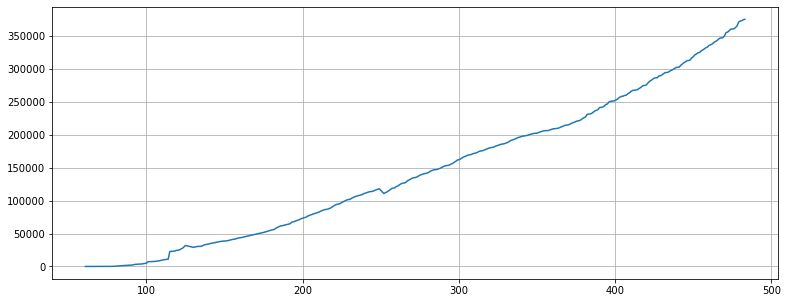

In [33]:
plt.figure(figsize=(13,5))
plt.grid(True)
plt.plot(df['date_number'], df['total_cases'])
#plt.plot(df['date'], df['new_cases'])
plt.show()

### Generación de un modelo para la predicción de contagios

Primero se separan los datos en _train_ y _test_ para el entrenamiento y pruebas del modelo. Se proponen dos tipos de modelo, mediante una Regresión Lineal y una Regresión Polinómica de 4to grado. 

In [4]:
xtrain, xtest, ytrain, ytest = tts(df['date_number'], df['total_cases'], test_size=0.2)

In [5]:
model = LinearRegression()
model.fit(np.array(xtrain).reshape(-1, 1), ytrain)
p = np.poly1d(np.polyfit(xtrain, ytrain, 4))

Ambos modelos se grafican con los datos reales para apreciar de forma vistual el comportamiento de ambos modelos. 

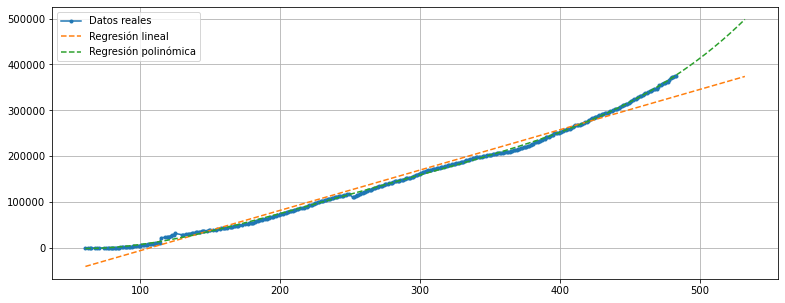

In [6]:
pred_x = list(range(min(df['date_number']),max(df['date_number'])+50)) # Predecir 50 dias mas
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(True)

plt.plot(df['date_number'], df['total_cases'], '.-', label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
plt.show()

Como se puede apreciar en la gráfica, el modelo polinómico se asemeja de mejor manera a los datos reales que el modelo de regresión lineal. Se calcula el Error Absoluto Medio de ambos modelos para determinar la diferencia de certeza de ambos modelos. Para esto se usa el set de _test_.

In [21]:
error_lineal = mean_absolute_error(ytest, model.predict(np.array(xtest).reshape(-1, 1)))
error_polinomial = mean_absolute_error(ytest, p(xtest))

<function matplotlib.pyplot.show(close=None, block=None)>

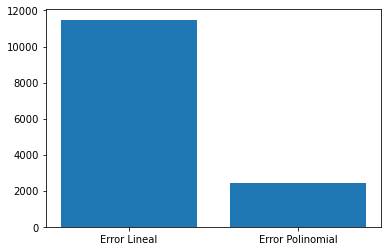

In [24]:
plt.bar(['Error Lineal', 'Error Polinomial'], [error_lineal, error_polinomial])
plt.show

Evidentemente el modelo polinomial logra predecir de mejor manera el comportamiento de los datos. 

## Predicción del número de contagios 

Se realiza una gráfica para predecir el número de contagios en el Ecuador para los siguientes dos meses. Como se aprecia en la gráfica, el número de contagios seguirá aumentando. 

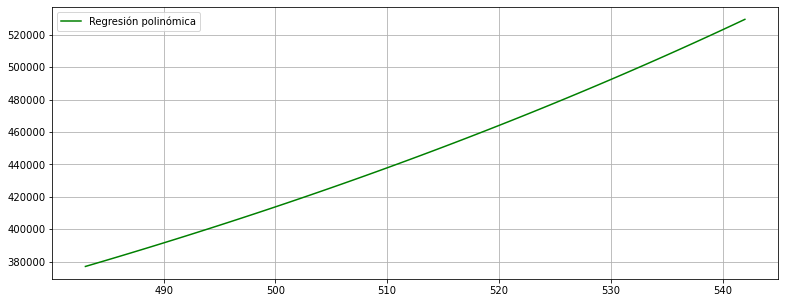

In [35]:
pred_x = list(range(max(df['date_number']),max(df['date_number'])+60)) # Predecir 50 dias mas
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(True)

plt.plot(pred_x, Ppred_y, 'g-', label='Regresión polinómica')

plt.legend(loc='upper left')
plt.show()

Existen varios factores que pueden afectar el comportamiento de los datos. Desde el 22 de enero de 2021 empezó la campaña de vacunación contra el COVID en el Ecuador. Evidentemente este factor afectará al comportamiento de la propagación del virus en el futuro. Para observar si desde enero de este año ha habido un comportamiento inusual en la propagación del virus, se realiza una gráfica comparando el número de contagios vs el número de personas vacunadas con al menos una dosis y el número de personas vacunadas completamente.

In [48]:
df_vac = pd.read_csv('vaccinations.csv').loc[:,['location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']]
df_vac = df_vac[df_vac['location']=='Ecuador']
df_vac.fillna(0)
FMT = '%Y-%m-%d'
date = df_vac['date']
df_vac['date_number'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-31", FMT)).days)
df_vac.fillna(method='ffill', inplace=True)
df_vac

location        date  total_vaccinations  people_vaccinated  \
3811  Ecuador  2021-01-21                 0.0                0.0   
3812  Ecuador  2021-01-22               108.0              108.0   
3813  Ecuador  2021-01-23               108.0              108.0   
3814  Ecuador  2021-01-24               108.0              108.0   
3815  Ecuador  2021-01-25               108.0              108.0   
...       ...         ...                 ...                ...   
3901  Ecuador  2021-04-21            643702.0           457403.0   
3902  Ecuador  2021-04-22            675510.0           486524.0   
3903  Ecuador  2021-04-23            711204.0           514854.0   
3904  Ecuador  2021-04-24            732717.0           532367.0   
3905  Ecuador  2021-04-25            743937.0           541420.0   

      people_fully_vaccinated  daily_vaccinations  date_number  
3811                      NaN                 NaN          387  
3812                      NaN               108.0          388  
3813                      NaN               341.0          389  
3814                      NaN               419.0          390  
3815                      NaN               458.0          391  
...                       ...                 ...          ...  
3901                 186299.0             23249.0          477  
3902                 188986.0             27197.0          478  
3903                 196350.0             28150.0          479  
3904                 200350.0             26798.0          480  
3905                 202517.0             27081.0          481  

[95 rows x 7 columns]

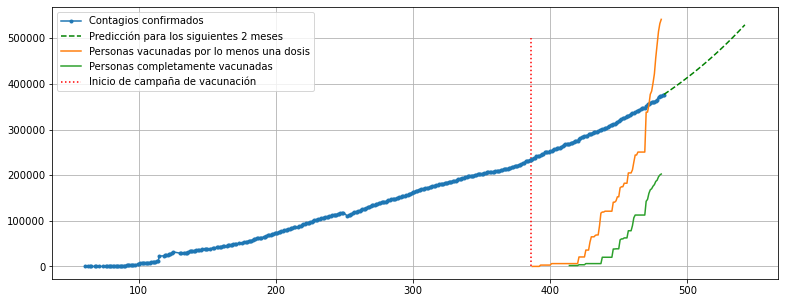

In [73]:
plt.figure(figsize=(13,5))
plt.grid(True)
#plt.plot(df['date'], df['new_cases'])
plt.vlines(386, 0, 500000, linestyles='dotted', colors='red', label='Inicio de campaña de vacunación')
plt.plot(df['date_number'], df['total_cases'], '.-', label='Contagios confirmados')
plt.plot(pred_x, Ppred_y, 'g--', label='Predicción para los siguientes 2 meses')
plt.plot(df_vac['date_number'], df_vac['people_vaccinated'], label='Personas vacunadas por lo menos una dosis')
plt.plot(df_vac['date_number'], df_vac['people_fully_vaccinated'], label='Personas completamente vacunadas')
plt.legend(loc='upper left')
plt.show()

En la gráfica se muestra que el comportamiento de los datos sobre el número de contagios confirmados a partir de la fecha de vacunación no muestra ningún cambio. Esto puede ser debido a que el tiempo transcurrido desde el inicio de la campaña de vacunación es muy reciente, así que la predicción realizada podría cumplirse durante un tiempo, pero podría variar en el futuro. 